# NumPy

## Agenad Part 2: Mathematical Functions

* Solving linear equation systems
* Error handling
* Numerical integration
* Polynom fitting
* Summary of NumPy mathematical functions

## Solving Linear equation Systems with `np.linalg.solve`

The `np.linalg.solve` function in NumPy is used to solve linear systems of equations:


## Syntax

`np.linalg.solve(A, B)`

**Parameters:**
- `A`: A square n × n coefficient matrix.
- `B`: A vector (or matrix) of size n or n × m containing the constants.

**Returns:**
- The solution vector x 


## Let's look at an example: Solving a Simple System of equations

Given is a system of equations:

$$
2x + y = 8  
$$
$$
x - y = 2
$$

In [2]:
import numpy as np

# The coefficients (2, 1) and (1, -1) form the rows of the matrix
A = np.array([
    [2, 1],
    [1, -1]
])
# the constants are 8 and 2, respectively.
B = np.array([8, 2])

#We want to solve for x and y
x,y = np.linalg.solve(A,B)

#Rounding to two decimal places

x = np.round(x,2)
y = np.round(y,2)

print("x is",x,"y is",y)

x is 3.33 y is 1.33


## Singular Matrix
The following equation system has no unique solution. What does that mean for NumPy?

$$−3x +5y +z=3$$

$$7x−4y −z=2$$

x+6y +z=8

In [ ]:
import numpy as np

A = np.array([
    [-3, 5, 1],
    [7, -4, -1],
    [1, 6, 1]
])
B = np.array([3, 2, 8])

x,y,z  = np.linalg.solve(A,B)

x = np.round(x,2)
y = np.round(y,2)
z = np.round(z,2)

print("x is ",x," y is ",y," z is ",z)  

LinAlgError: Singular matrix

## Try and Catch

This situations happen quite often. Now we could go and analyze the matrix of for invertability and work if ```if... else``` to make sure do do not run into an error.
But this can be a cumbersome, sometimes impossible thing to do.

Instead we can choose a more progressive approach: We accept there will be errors, but we are handling this exception with some extra code.
In python we can you the ```try:``` and ```except:``` statements to do so.

```
try: 
    # do some code here

except: 
    # if an error occurred in the try block, the program will jump here

```


In [2]:
import numpy as np

A = np.array([[-3, 5, 1], [7, -4, -1], [1, 6, 1]])
#A = np.array([[6, -2, -4], [1, -1, -2], [4, -5, 2]])
B = np.array([3, 2, 8])
#B = np.array([2, -3, 7])

try:
    x,y,z  = np.linalg.solve(A,B)
    x = np.round(x,2)
    y = np.round(y,2)
    z = np.round(z,2)
    print("x is ",x," y is ",y," z is ",z) 

except:
    print("The system of equations could not be solved" )



The system of equations could not be solved


## Analyze Exception 

Sometimes, we also want to analyze what kind of error we are dealing with.
The except statement allows us to catch an Exception-Object to do so.

In [4]:
try:
    x,y,z  = np.linalg.solve(A,B)
    x = np.round(x,2)
    y = np.round(y,2)
    z = np.round(z,2)
    print("x is ",x," y is ",y," z is ",z) 

except Exception as e:
    print("The system of equations could not be solved:", e.args[0] )

The system of equations could not be solved: Singular matrix


## Numerical Integration with the trapezoidal rule

The trapezoidal rule calculates the area under a curve by summing the area of a series of trapezoids drawn between two adjacent points on the graph of the function. This usually provides a more accurate approximation of the integral than the simple rectangular method.

![trapint](https://www.mathelounge.de/?qa=blob&qa_blobid=17953428120461981830) <br>

Let's Approximate the integral of $$ f(x) = x^2 $$ over the interval [0,1]:

 $$I = \int_0^1 x^2 \, dx $$






In [15]:
# Define the interval and number of subintervals

a = 0  # Start of the interval
b = 1  # End of the interval
n = 50  # Number of subintervals -> more subintervals need more time but give better accuracy

# Generate points for x and compute corresponding y values

x = np.linspace(a, b, n)  # Subinterval points

y = np.power(x,2) # Function values at these points

# Use the trapezoidal rule to approximate the integral
integral = np.trapz(y, x)

integral = np.round(integral,2)

print(f"Approximate integral of f(x) = x^2 over [0, 1] is: {integral}")

Approximate integral of f(x) = x^2 over [0, 1] is: 0.33


## Polynom fitting

* Let's assume we have dataset with temperature over time (x,y) and now we want find an equation that aproximates this data.
We call this process *data fitting*.
* There are many libraries and algorithms out there that help us with data fitting in all kinds of situations (see also: SciPy, Tensor FLow)
* If your data can be described by a polynom, The a NumPy method called ```numpy.polyfit(x, y, deg)``` is very helpful.
  * x, y are de values of x and y for each point
  * deg is the degree of the polynom we want to fit
  * Full reference: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html 
* The ```polyfill()``` method returns the coefficients of the polynom
* 


[-7.39520959e-47  1.28183350e-28  2.22184072e-10 -3.85118203e+08]


/usr/local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


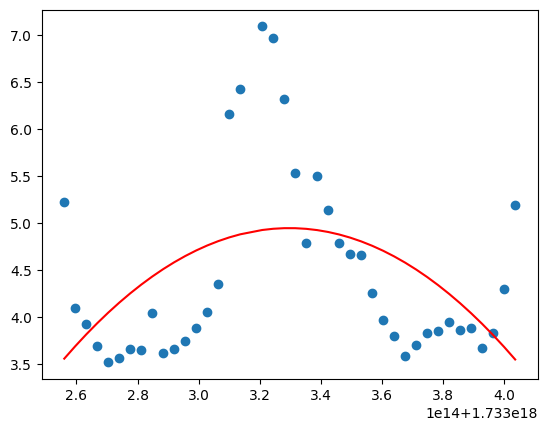

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv',  delimiter=',')
data.columns = ['time', 'temperature']
data = data.dropna()
data['time'] = pd.to_datetime(data['time']).astype('int') # converst time string to seconds
data = data[data['temperature'] < 10] # remove outliers  (temperature > 10)
#data = data[6:20]
coefficients = np.polyfit(data['time'], data['temperature'], 3)
print(coefficients)

fig, ax = plt.subplots() 
ax.plot(data['time'], np.polyval(coefficients, data['time']), label='Trendline', color='red')
ax.scatter(data['time'], data['temperature'])
plt.show()

# For your Reference


## Arithmetics on arrays

In [15]:
import numpy as np

vec1 = np.array([1,3,0])
vec2 = np.array([0,1,0])

print(np.add(vec1, vec2))
print(np.subtract(vec1, vec2))
print(np.dot(vec1, vec2))

[1 4 0]
[1 2 0]
3


# Summary of Mathematical Functions in NumPy

NumPy provides a variety of mathematical functions for numerical computations. Here's a summary of the most common ones:


### 1. Trigonometric Functions
| Function        | Description                        | Formula                                    |
| --------------- | ---------------------------------- | ------------------------------------------ |
| `np.sin(x)`     | Sine of `x` (in radians).          | $$ \sin(x) $$                              |
| `np.cos(x)`     | Cosine of `x` (in radians).        | $$ \cos(x) $$                              |
| `np.tan(x)`     | Tangent of `x` (in radians).       | $$ \tan(x) $$                              |
| `np.arcsin(x)`  | Inverse sine of `x`.               | $$ \arcsin(x) $$                           |
| `np.arccos(x)`  | Inverse cosine of `x`.             | $$ \arccos(x) $$                           |
| `np.arctan(x)`  | Inverse tangent of `x`.            | $$ \arctan(x) $$                           |
| `np.degrees(x)` | Converts radians to degrees.       | $$ x \cdot \frac{180}{\pi} $$              |
| `np.radians(x)` | Converts degrees to radians.       | $$ x \cdot \frac{\pi}{180} $$              |
| `np.sinh(x)`    | Hyperbolic sine of `x`.            | $$ \sinh(x) = \frac{e^x - e^{-x}}{2} $$    |
| `np.cosh(x)`    | Hyperbolic cosine of `x`.          | $$ \cosh(x) = \frac{e^x + e^{-x}}{2} $$    |
| `np.tanh(x)`    | Hyperbolic tangent of `x`.         | $$ \tanh(x) = \frac{\sinh(x)}{\cosh(x)} $$ |
| `np.arcsinh(x)` | Inverse hyperbolic sine of `x`.    | $$ \sinh^{-1}(x) $$                        |
| `np.arccosh(x)` | Inverse hyperbolic cosine of `x`.  | $$ \cosh^{-1}(x) $$                        |
| `np.arctanh(x)` | Inverse hyperbolic tangent of `x`. | $$ \tanh^{-1}(x) $$                        |

---

### 2. Exponential and Logarithmic Functions
| Function      | Description                               | Formula            |
| ------------- | ----------------------------------------- | ------------------ |
| `np.exp(x)`   | \( e^x \), exponential of `x`.            | $$ e^x $$          |
| `np.log(x)`   | Natural logarithm of `x`.                 | $$ \ln(x) $$       |
| `np.log10(x)` | Base-10 logarithm of `x`.                 | $$ \log_{10}(x) $$ |
| `np.log2(x)`  | Base-2 logarithm of `x`.                  | $$ \log_{2}(x) $$  |
| `np.log1p(x)` | \( \ln(1 + x) \), accurate for small `x`. | $$ \ln(1 + x) $$   |

---

### 3. Power and Root Functions
| Function              | Description                  | Formula              |
| --------------------- | ---------------------------- | -------------------- |
| `np.power(x, y)`      | Raises `x` to the power `y`. | $$ x^y $$            |
| `np.sqrt(x)`          | Square root of `x`.          | $$ \sqrt{x} $$       |
| `np.cbrt(x)`          | Cube root of `x`.            | $$ \sqrt[3]{x} $$    |
| `np.power(x, 1/4...)` | fourth and every other root  | $$ \sqrt[4]{x} $$... |


---

### 4. Rounding and Modulus Functions
| Function             | Description                             | Formula                                 |
| -------------------- | --------------------------------------- | --------------------------------------- |
| `np.round(x, n)`     | Rounds `x` to `n` decimal places.       | $$ \text{round}(x, n) $$                |
| `np.floor(x)`        | Rounds `x` down to the nearest integer. | $$ \lfloor x \rfloor $$                 |
| `np.ceil(x)`         | Rounds `x` up to the nearest integer.   | $$ \lceil x \rceil $$                   |
| `np.trunc(x)`        | Removes the decimal part of `x`.        | $$ \text{trunc}(x) $$                   |
| `np.mod(x, y)`       | Remainder of `x` divided by `y`.        | $$ x \mod y $$                          |
| `np.remainder(x, y)` | Another way to compute the remainder.   | $$ x - y \cdot \lfloor x / y \rfloor $$ |


---

### 6. Statistical Functions
| Function              | Description                | Formula                                                      |
| --------------------- | -------------------------- | ------------------------------------------------------------ |
| `np.mean(x)`          | Average of array `x`.      | $$ \mu = \frac{1}{n} \sum_{i=1}^n x_i $$                     |
| `np.median(x)`        | Median value of array `x`. | $$ \text{median}(x) $$                                       |
| `np.std(x)`           | Standard deviation of `x`. | $$ \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2} $$ |
| `np.var(x)`           | Variance of `x`.           | $$ \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2 $$      |
| `np.min(x)`           | Minimum value in `x`.      | $$ \text{min}(x) $$                                          |
| `np.max(x)`           | Maximum value in `x`.      | $$ \text{max}(x) $$                                          |
| `np.percentile(x, q)` | qth percentile of `x`.     | $$ \text{percentile}(x, q) $$                                |

---

### 7. Random Number Generation
| Function                             | Description                                                                 |
| ------------------------------------ | --------------------------------------------------------------------------- |
| `np.random.rand(dimension)`          | Generates random numbers in [0, 1) (uniform distribution).                  |
| `np.random.randn(dimension)`         | Generates random numbers from a normal (Gaussian) distribution.             |
| `np.random.randint(low, high, size)` | Generates random integers between `low` (inclusive) and `high` (exclusive). |
| `np.random.choice(array, size)`      | Randomly selects elements from an array.                                    |